# Q.1.

Google trends

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

df = pd.read_csv("multiTimeline.csv",parse_dates=True) #using downloaded data from trends of search for the term workplace benefits in the last year
df.head()

,Week,Workplace benefits
0,2020-12-06,80
1,2020-12-13,28
2,2020-12-20,20
3,2020-12-27,29
4,2021-01-03,18


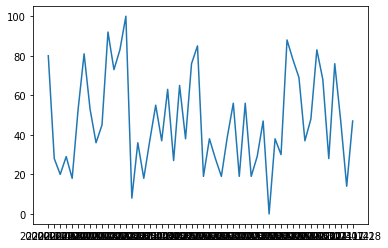

In [2]:
plt.plot(df['Week'], df['Workplace benefits']) #plotting the graph to see the trend

In [3]:
df = df.dropna() #drop any missing values from interfering with ACF and PACF

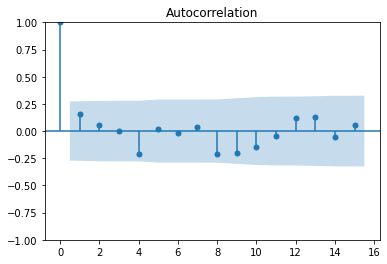

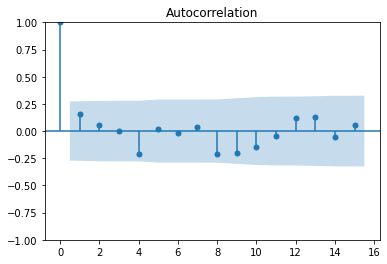

In [4]:
#autocorrelation - how well a time series correlates with a lagged copy of itself at a particular lag interval

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df[['Workplace benefits']], lags = 15)


C:\Users\hafsa\AppData\Roaming\Python\Python39\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


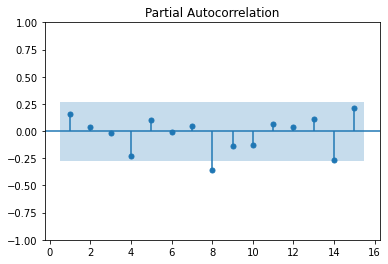

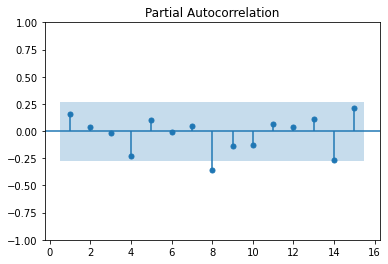

In [5]:
plot_pacf(df[['Workplace benefits']], zero = False, lags = 15)

In [6]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df['Workplace benefits'],order=(1,1,2))

Autoregressive integrated moving average (ARIMA) models predict future values based on past values. ARIMA makes use of lagged moving averages to smooth time series data. 
The name ARMA is short for Autoregressive Moving Average. It comes from merging two simpler models - the Autoregressive, or AR, and the Moving Average, or MA. 

Using an ARIMA model, was a better fit for this data set and helped make it stationary. The ARIMA model was also the best fit for this data as both the ACF and PACF cuts immediately after one lag.

In [7]:
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:     Workplace benefits   No. Observations:                   52
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -236.333
Date:                Fri, 03 Dec 2021   AIC                            480.667
Time:                        22:00:42   BIC                            488.394
Sample:                             0   HQIC                           483.619
                                 - 52                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7698      0.242     -3.184      0.001      -1.244      -0.296
ma.L1         -0.0342      9.423     -0.004      0.997     -18.503      18.435
ma.L2         -0.9652      9.041     -0.107      0.915     -18.686      16.756
sigma2       566.9940   5330.855      0.106      0.915   -9881.290     1.1e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.28   Jarque-Bera (JB):                 2.18
Prob(Q):                              0.60   Prob(JB):                         0.34
Heteroskedasticity (H):               0.78   Skew:                             0.26
Prob(H) (two-sided):                  0.61   Kurtosis:                         2.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Q.2.

The Fourier Transform is a mathematical operation that changes the domain (x-axis) of a signal from time to frequency. The Fourier Transform is used in a wide range of applications, such as image analysis, image filtering, image reconstruction and image compression.

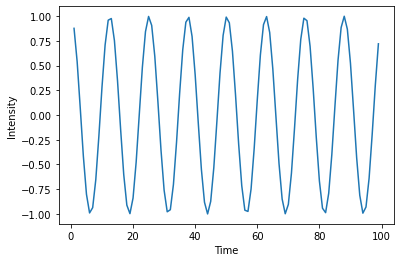

In [10]:
from scipy.fft import fft, ifft
from scipy import signal

x = np.arange(1,100,1)
y = np.cos(x/2)
plt.plot(x,y)
plt.xlabel('Time')
plt.ylabel('Intensity')
plt.show()

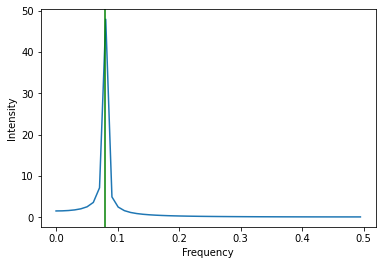

In [13]:
#power spectral density
psd = np.abs(np.fft.rfft(y))
freqs = np.fft.rfftfreq(len(y))
plt.plot(freqs,psd)
#amplitude
plt.axvline(1/(4*np.pi),c='g')
plt.xlabel('Frequency')
plt.ylabel('Intensity')
plt.show()